In [39]:
#https://towardsdatascience.com/complete-guide-to-regressional-analysis-using-python-bbe76b3e451f

### What is Regression?

In the realm of Machine Learning, tasks are often split into four major categories: Supervised Learning, Unsupervised Learning, Semi-Supervised Learning, and Reinforcement Learning. Regression falls into the domain of Supervised Learning, where the goal is to learn or model a function that maps a set of inputs to a set of outputs. In Supervised Learning, our set of outputs are commonly called the dependent variable in statistics or the target variable in the Machine Learning Community. This target variable can either be discrete, commonly called Classification, or continuous, commonly called Regression. In this way, Regression is simply trying to predict a continuous target variable given a set of inputs.

### Our Data Set — Medical Cost

To give some application to the theoretical side of Regressional Analysis, we will be applying our models to a real dataset: Medical Cost Personal. This dataset is derived from Brett Lantz’ textbook: Machine Learning with R, where all of his datasets associated with the textbook are royalty free under the following license: Database Contents License (DbCL) v1.0.
This dataset contains 1338 medical records of different individuals recording a few metrics: age, sex, bmi, number of children, whether or not they smoke, and the region they live. 

#### The goal is to use these features to predict the persons ‘charges’, medical cost.


In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [82]:
data = pd.read_csv("./data/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [83]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [84]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='sex', ylabel='count'>

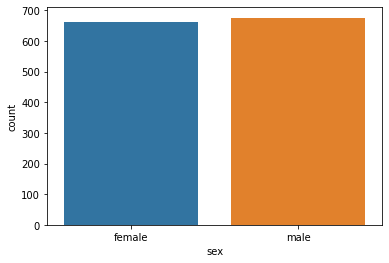

In [85]:
sns.countplot(x='sex', data=data)

<AxesSubplot:xlabel='smoker', ylabel='count'>

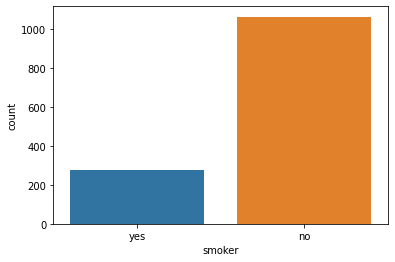

In [86]:
sns.countplot(x='smoker', data=data)

<AxesSubplot:xlabel='region', ylabel='count'>

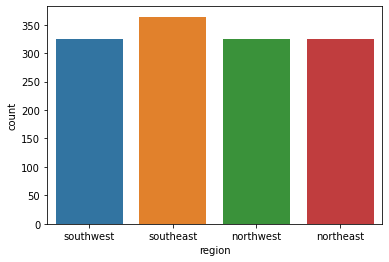

In [87]:
sns.countplot(x='region', data=data)

In [88]:
data = pd.get_dummies(data)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [89]:
X = data.drop(["charges"], axis=1)
Y = data["charges"]

<AxesSubplot:>

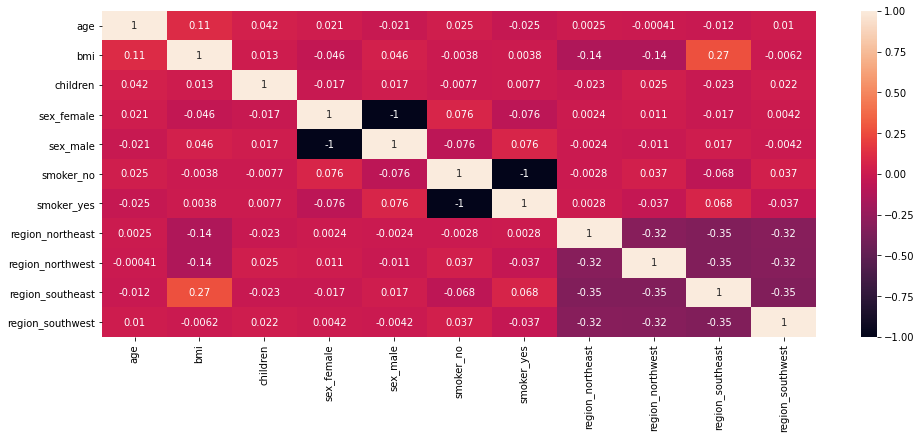

In [90]:
plt.figure(figsize=(16, 6))
sns.heatmap(X.corr(), annot=True)

<AxesSubplot:>

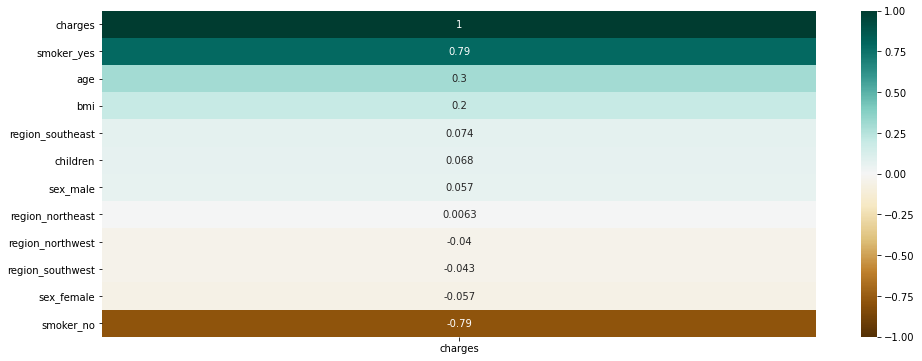

In [91]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr()[['charges']].sort_values(by='charges', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [92]:
X = X.to_numpy()
Y = Y.to_numpy()

In [93]:
n = len(X)

train_perc = 0.75  # percentage of training set
train_ind = range(0, int(train_perc*n))  # indices of dataset for training
train_x = X[train_ind]
train_y = Y[train_ind]

test_ind = range(n-int(train_perc*n), n)  # indices of dataset for testing
test_x = X[test_ind]
test_y = Y[test_ind]

(array([404., 304.,  95.,  60.,  30.,  38.,  43.,  26.,   1.,   2.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

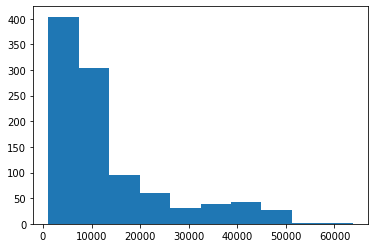

In [94]:
plt.hist(train_y)

Heavily Skewed, Least Squares works on the assumption that y. Meaning Y needs to be distributed Normally; however, as we can see above it is not... One common solution to skewed distrubutions above is to perform logarithm transformation:

(array([ 39.,  80.,  77., 113., 153., 207., 119.,  90.,  82.,  43.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <BarContainer object of 10 artists>)

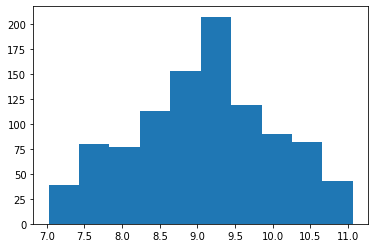

In [96]:

train_y = np.log(train_y)
test_y = np.log(test_y)
plt.hist(train_y)

The two most common error measurements in Machine Learning are Mean Squared Error (MSE) and Mean Absolute Error (MAE)

In the Machine Learning models we’ll look into today, MSE is chosen as the measurement to quantify error due to the convex nature of squaring the error — in layman’s terms, the numerical methods have an easier time of minimizing squared numbers rather than absolute due to the derivative of the absolute operation being non-defined.

There exists only one problem with the error measurements described above, they do not explain how well the model performs relative to the target value, only the size of the error. Does a large error mean a poor model? Does a small error mean a good model? A good model can have an extremely large MSE while a poor model can have a small MSE if the variation of the target variable is small. 

The problem with only using MSE or MAE is that it does not take into account the variation of the target variable. If the target variable has a lot of variance, as in the dataset on the right, then the MSE will be naturally higher. 

##### A popular metric used to take the variation of the target variable into account is known as the Coefficient of Determination, commonly called R Squared:

$ R^{2} = 1 - \frac{RSS}{TSS}$

RSS = residual sum squared = $\sum_{1}^n(f(x_i) - y)^2$
TSS = total sum of squares

 R Squared ranges from (-infinity, 1]. Where the interpretation is the percentage of the variation of the target variable explained. For example, suppose a model has an R Squared value of 0.88, then that model explains approximately 88% of the variability of the target variable. Hence, larger R Squared values are more desirable as the model will explain a greater percentage of the target variable. However, if the RSS of the model is larger than the TSS, then the R Squared metric will be negative, which means that the variance of the model outweighs the variance of the target, aka the model sucks.
 
### Least Squares Solution (MLR)

Now that we’ve defined our error measurement, it’s time to introduce our first classic Machine Learning model, Least Squares! As with most of the models going to be discussed, Least Squares works off the assumption that the dependent/target variable is a linear combination of the feature variable (assuming k number of features):

$y = \beta_{0} + \beta_{1}x_{1} + ... + \beta_{k}x_{k}$

where $\beta_{0}$ is the intercept and $\beta_{k}$ is the coefficient

The goal of the coefficients are to act as the slope for the respective input variable, and the intercept is to act as the point where the target variable starts when the input variables are zero.

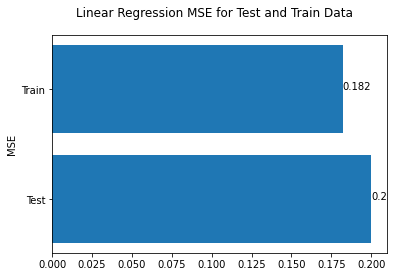

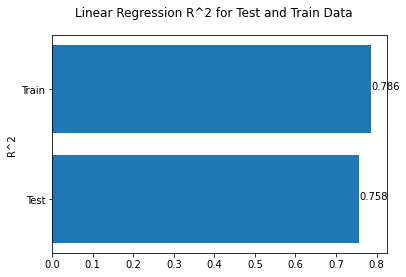

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create model
model = LinearRegression()
# calculate beta using train
model.fit(train_x, train_y)

err = []  # calculate MSE error
err.append(mean_squared_error(test_y, model.predict(test_x)))  # test MSE
err.append(mean_squared_error(train_y, model.predict(train_x)))  # train MSE
plt.barh(['Test', 'Train'], err)
for i, v in enumerate(err):
    plt.text(v, i, str(np.round(v, 3)))
plt.ylabel("MSE")
plt.suptitle("Linear Regression MSE for Test and Train Data")
plt.show()

err = []  # calculate R^2 error
err.append(r2_score(test_y, model.predict(test_x)))  # test MSE
err.append(r2_score(train_y, model.predict(train_x)))  # train MSE
plt.barh(['Test', 'Train'], err)
for i, v in enumerate(err):
    plt.text(v, i, str(np.round(v, 3)))
plt.ylabel("R^2")
plt.suptitle("Linear Regression R^2 for Test and Train Data")
plt.show()

As we can see from the above barplot on the left hand side, the MSE for both the testing and training sets are extremely low, only around 0.19; however, if you remember, the target variable underwent a Logarithmic Transformation, meaning that an MSE of 0.016 is not relatively small given the scale of the target variable. Therefore, a better measurement is to assess the R² value, which we can see from the barplot on the right hand side is decent. Our model only explains approximately 79% of the variability of the target variable for the training set and roughly 76% of the variability for the testing set. Although is result is reasonable for some scenarios, for this simple dataset this is known as underfitting, when a model performs poorly at predicting a target variable. We will cover some methodologies on how to fix this problem later.

### Weighted Least Squares Solution

One of the main assumptions made under Least Squares is that the errors, epsilon, is Normally distributed with constant Variance:

$\epsilon \sim N(0,\sigma^2I)$ 

One can check this assumption by plotting the residuals, f(x)-y, verses the actual, commonly called a residual plot. Here is our residual plot from our previous model on the training sample:

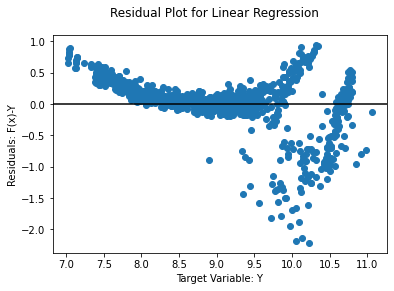

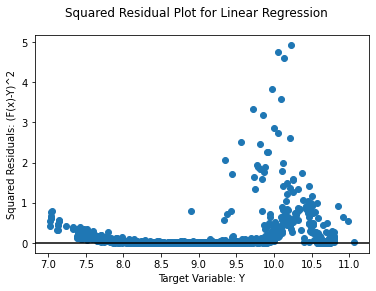

In [75]:
residuals = model.predict(train_x)-train_y
plt.scatter(train_y, residuals)
plt.xlabel("Target Variable: Y")
plt.ylabel("Residuals: F(x)-Y")
plt.suptitle("Residual Plot for Linear Regression")
plt.axhline(0, color='black')
plt.show()

residuals = np.power(model.predict(train_x)-train_y, 2)
plt.scatter(train_y, residuals)
plt.xlabel("Target Variable: Y")
plt.ylabel("Squared Residuals: (F(x)-Y)^2")
plt.suptitle("Squared Residual Plot for Linear Regression")
plt.axhline(0, color='black')
plt.show()

As we can see from above, the variance of our residual errors does not have mean of zero nor constant variance, as it is highly non-linear. In addition, we can see that the squared residuals show a slight upward trend as the target variable approaches its max value. Residual errors with non-constant variance are called heteroscedastic. One way to combat heteroscedasticity is through Weighted Least Squares. Weighted Least Squares is like standard Least Squares; however, each observation is weighted by its own unique value. In this way, observations with larger weights are more favored by the model to fit than smaller weights. 

One of the main powers of WLS is the ability to weight different instances to give preference within the model, either to create homoscedasticity, constant variance, or to model better certain records. However, one of the main drawbacks of WLS is how to determine the weights

In [76]:
weights =np.power(model.predict(train_x)-train_y, 2)
# create model
model2 = LinearRegression()  # create model
model2.fit(train_x, train_y, weights)

LinearRegression()

If you were to test these weights above, the residual plot would look similar and with similar R² and MSE scores, this is because our residual variance is highly non linear.

For this situation, we only have one solution, try the addition of nonlinear terms in hopes to explain the variance. Which we will cover with Kernel Regression, but first we need to discuss Regularization.

### How to deal with Overfitting — Regularization
Suppose we trained a Linear Regression model on a given dataset, and during its application and deployment we found out that it was performing extremely poorly, despite having good MSE and R² scores on the training data; this is known as overfitting — when the metrics on the Testing Dataset are much worse than the Training dataset.

There are two main types of Regularization when it comes to Linear Regression: Ridge and Lasso. First, lets start off with Ridge Regression, commonly called L2 Regularization as its penalty term squares the beta coefficients to obtain the magnitude. The idea behind Ridge Regression is to penalize large beta coefficients. The Loss Function that Ridge Regression tries to minimize is the following:

$J(\hat{\beta}) = \sum_{i}^n(f(x)-y)^2 + \lambda\sum_{i}^n\beta_{i}^2$

As we can see from above, the Loss function is exactly the same as before, except now with the addition of the penalty term in red. The parameter lambda scales the penalty. For example, if lambda=0, then the function is the same as before in Least Squares; however, as lambda grows larger the model will lead to underfitting as it will penalize the size of the beta coefficients to zero.

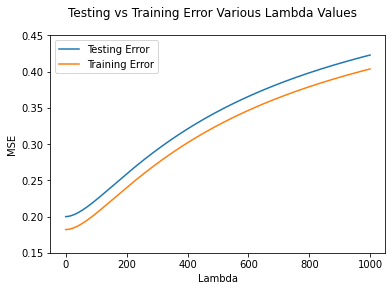

In [104]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

lambdas = np.arange(0, 1000, 1)
err_train = []
err_test = []
for lam in lambdas:
    # create model
    model = Ridge(alpha=lam)
    # calculate beta using train
    model.fit(train_x, train_y)
    err_test.append(mean_squared_error(model.predict(test_x), test_y))
    err_train.append(mean_squared_error(model.predict(train_x), train_y))
plt.plot(lambdas, err_test, label="Testing Error")
plt.plot(lambdas, err_train, label="Training Error")
plt.legend()
plt.xlabel("Lambda")
plt.yticks(np.arange(0.15, 0.50, step=0.05))
#plt.xticks(np.arange(0, 1000, step=200))
plt.ylabel("MSE")
plt.suptitle("Testing vs Training Error Various Lambda Values")
plt.show()

#### We use regularization to avoid overfitting

### Lasso regularization 

Lasso is commonly called L1 regularization as its penalty term is built off the absolute value of the beta coefficients

$J(\hat{\beta}) = \sum_{i}^n(f(x)-y)^2 + \lambda\sum_{i}^n |\beta_{i}|$

Notice that the only difference between Ridge and Lasso Regularization is that Ridge squares the beta coefficients while Lasso takes the absolute value. The main difference between the two is that Ridge penalizes the size of the beta coefficients, whereas Lasso will drive some of the beta coefficient values to zero, leading to feature selection.

These types of penalty terms can often be rewritten as a constraint problem:

$Ridge = \sum_{i}^n \beta_{i}^2 \leq \lambda$

$Lasso = \sum_{i}^n |\beta_{i}| \leq \lambda$

Because Ridge regression squares the beta coefficients, plotting the constraint would lead to a circle; whereas Lasso would lead to square.

Unfortunately, finding the analytical solution for beta in Lasso Regularization is difficult using matrix calculus as the gradient of the absolute value operation is undefined, therefore numerical methods like Coordinate Descent are often utilized. Because of the complex nature of these algorithms I will not detail the math. In python, Lasso Regression can be performed as follows:

<ipython-input-105-31328d6bc49c>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(train_x, train_y)
/Users/rafaelbaetacarreira/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/rafaelbaetacarreira/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.31484467601693, tolerance: 0.08552005971445267
  model = cd_fast.enet_coordinate_descent(


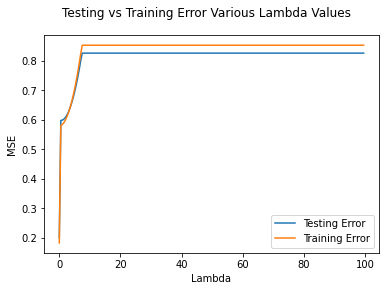

In [105]:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lambdas = np.arange(0, 100, 0.5)
err_train = []
err_test = []
for lam in lambdas:
    # create model
    model = Lasso(alpha=lam)
    # calculate beta using train
    model.fit(train_x, train_y)
    err_test.append(mean_squared_error(model.predict(test_x), test_y))
    err_train.append(mean_squared_error(model.predict(train_x), train_y))
plt.plot(lambdas, err_test, label="Testing Error")
plt.plot(lambdas, err_train, label="Training Error")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.suptitle("Testing vs Training Error Various Lambda Values")
plt.show()

As we can see from above, as we increase our lambda value, our error on the training and testing set increase drastically, eventually converging around lambda=15. The reason why the error converged is because our lambda value was too large for the model and it drove all the beta coefficients to zero. If you remember correctly, our dataset was not failing from overfitting but underfitting! Therefore, it makes no sense to use regularization, which is why our testing error is getting worse instead of better! I just wanted to showcase how you use Lasso Regression if your model was exhibiting overfitting!

The last Regularization technique I am going to introduce is Elastic Net, which came about to harmonize Ridge and Lasso, as Ridge penalizes large coefficients whereas Lasso drives coefficients to zero. The idea behind Elastic Net is create a penalty that will both create feature selection and minimize the size of the weights. There are many different versions of Elastic Net, here are the two most common:

Elastic Net Penalty Type 1 = $\lambda_{1}\sum_{i}^n \beta_{i}^2 + \lambda_{2}\sum_{i}^n |\beta_{i}|$

Elastic Net Penalty Type 2 = $\frac{\lambda_{1}\sum_{i}^n \beta_{i}^2}{\lambda_{2}\sum_{i}^n |\beta_{i}|}$


As one can see, the penalty term is a combination of Ridge and Lasso, each with their own lambda value to control how much each penalty term affect the model.

### How to deal with Underfitting — Kernel Regression
